In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


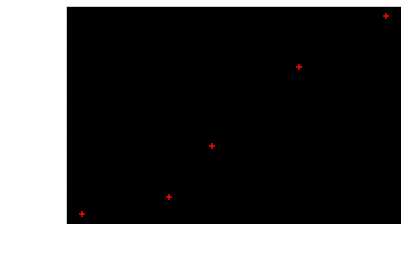

In [3]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [8]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [9]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [10]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [11]:
reg.predict([[3300]])

array([628715.75342466])

In [12]:
reg.coef_

array([135.78767123])

In [13]:
reg.intercept_

180616.43835616432

#### Y = m * X + b (m is coefficient and b is intercept)

In [14]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

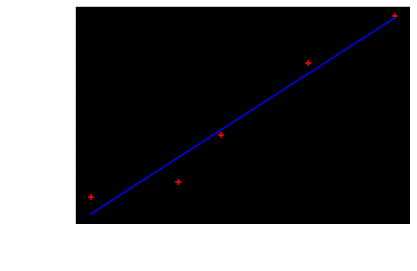

In [29]:
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

## Generate CSV file with list of home price predictions

In [20]:
d = pd.read_csv('./areas.csv')
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [21]:
p = reg.predict(d)

In [22]:
d['prices'] = p

In [23]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [24]:
d.to_csv('prediction.csv')